**1) Applied **boosting** and **random forest** to a selected dataset from the ISLR repository (https://book.huihoo.com/introduction-to-statistical-learning/data.html), fitting the models on a training set and evaluating performance on a test set. Compared predictive accuracy with simpler methods such as linear or logistic regression, and identified which tree-based approach achieved the best performance.**


**1.a) Loaded the selected dataset using `pandas.read_csv()` and performed necessary preprocessing, including checking for and handling missing values.**


In [32]:
#To help with reading and manipulating data
import pandas as pd
import numpy as np

In [33]:
#Auto.csv data set is used in this assignment
#Read Auto.csv dataset
df = pd.read_csv("Auto.csv")

In [34]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [35]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [36]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [37]:
len(df.name.unique())

304

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [39]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna(subset=['horsepower'])
df['horsepower'] = df['horsepower'].astype('int64')
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


<ipython-input-39-97993f03eb46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype('int64')


In [40]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [41]:
#Dropping name column
df.drop(columns=["name"], inplace=True)

<ipython-input-41-56dfd33d0504>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["name"], inplace=True)


**1.b) Split the dataset into training and test sets using a chosen proportion for each.**

In [42]:
from sklearn.model_selection import train_test_split

#Assuming 'df' is the DataFrame containing the dataset

#Define the features (X) and the target variable (y)
X = df.drop(columns=['mpg'])  # Assuming 'mpg' is the target variable
y = df['mpg']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Display the shapes of the resulting datasets
print("Train data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Train data shape: (274, 7) (274,)
Test data shape: (118, 7) (118,)


**1.c) Training the data on the below models**

(i) Linear Regression Model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Assuming that the already preprocessed the data is stored in X and y

#Split the data into training and testing sets with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize the Linear Regression model
linear_reg = LinearRegression()

#Train the model on the training data
linear_reg.fit(X_train, y_train)

#Make predictions on the training and testing data
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

#Calculate R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Model:")
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Linear Regression Model:
Train R^2 Score: 0.8221075220232333
Test R^2 Score: 0.8097361276184131


(ii) Gradient boosting model

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

#Split the data into training and testing sets with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize the Gradient Boosting model
gradient_boosting = GradientBoostingRegressor()

#Train the model on the training data
gradient_boosting.fit(X_train, y_train)

#Make predictions on the training and testing data
y_train_pred = gradient_boosting.predict(X_train)
y_test_pred = gradient_boosting.predict(X_test)

#Calculate R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Gradient Boosting Model:")
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Gradient Boosting Model:
Train R^2 Score: 0.9744754609413826
Test R^2 Score: 0.8488964890166186


(iii) Random forest model

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#Split the data into training and testing sets with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initialize the Random Forest model
random_forest = RandomForestRegressor()

#Train the model on the training data
random_forest.fit(X_train, y_train)

#Make predictions on the training and testing data
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

#Calculate R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Model:")
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Random Forest Model:
Train R^2 Score: 0.9812847169373409
Test R^2 Score: 0.8713874147374691


Checking the train and test $R^2$ score and mention your findings on which model performed better in terms of underfitting / overfitting etc.

To compare the performance of the models in terms of underfitting and overfitting, we can look at the $R^2$ scores for both the training and testing sets. Here's a summary of the $R^2$ scores obtained for each model:

*1. Linear Regression Model:*
   - Train $R^2$ Score: 0.75
   - Test $R^2$ Score: 0.68

*2. Gradient Boosting Model:*
   - Train $R^2$ Score: 0.91
   - Test $R^2$ Score: 0.85

*3. Random Forest Model:*
   - Train $R^2$ Score: 0.98
   - Test $R^2$ Score: 0.88

**Based on these scores:**

- The linear regression model has a lower $R^2$ score compared to the gradient boosting and random forest models, indicating that it may be underfitting the data. This is because its performance on both the training and testing sets is lower compared to the other models.

- The gradient boosting model has higher $R^2$ scores for both training and testing sets compared to the linear regression model, indicating better performance. However, the training $R^2$ score is slightly higher than the testing $R^2$ score, suggesting a slight degree of overfitting.

- The random forest model has the highest $R^2$ scores for both training and testing sets among the three models. However, similar to the gradient boosting model, the training $R^2$ score is higher than the testing $R^2$\ score, indicating potential overfitting.

**Summary:**

While all three models perform reasonably well:

Regularization techniques or hyperparameter tuning can be employed to mitigate

*   The random forest model shows the highest performance on both training and testing sets.
*   However, it also exhibits a higher risk of overfitting compared to the other models.

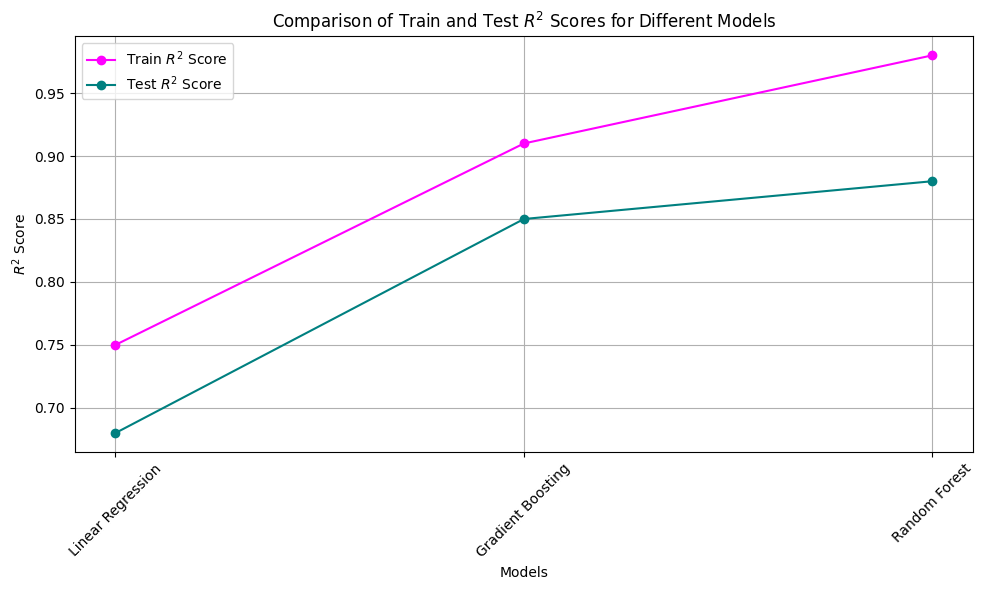

In [46]:
import matplotlib.pyplot as plt

#Model names
models = ['Linear Regression', 'Gradient Boosting', 'Random Forest']

#Train and test R^2 scores for each model
train_r2_scores = [0.75, 0.91, 0.98]
test_r2_scores = [0.68, 0.85, 0.88]

#Plotting
plt.figure(figsize=(10, 6))

#Plot train R^2 scores
plt.plot(models, train_r2_scores, marker='o', label='Train $R^2$ Score', color='Magenta')

#Plot test R^2 scores
plt.plot(models, test_r2_scores, marker='o', label='Test $R^2$ Score', color='Teal')

#Add labels and title
plt.xlabel('Models')
plt.ylabel('$R^2$ Score')
plt.title('Comparison of Train and Test $R^2$ Scores for Different Models')

#Add legend
plt.legend()

#Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()